In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **1.Load the Dataset**

In [6]:
df=pd.read_csv("C:/Users/bikki/Downloads/car price.csv")
df

,Id,Manufacturer,Model,Prod_Year,Category,Leather_Interioe,Fuel_Type,Engine Volume,Kilometers_Driven,Gear_Box_Type,Drive_Wheel,Selling_Date,Wheel,Color,Airbags,Price
0,45624039,FORD,Mustang,2016,Cabriolet,Yes,Petrol,2.3 Turbo,75000.0,Tiptronic,Rear,02-03-2023,Left wheel,Silver,6.0,423370
1,45766794,MITSUBISHI,Pajero,1997,Jeep,No,Petrol,2.4,142000.0,Automatic,4x4,02-03-2023,Left wheel,Blue,6.0,156810
2,45709646,TOYOTA,RAV 4,2001,Jeep,No,Petrol,2,91000.0,Automatic,4x4,02-03-2023,Right-hand drive,Silver,4.0,108200
3,45816588,SUZUKI,Grand Vitara,2008,Jeep,No,Petrol,1.6,98000.0,Automatic,4x4,02-03-2023,Left wheel,Black,12.0,156810
4,45759758,MITSUBISHI,Pajero Mini,2006,Jeep,No,Petrol,0.7,314000.0,Manual,4x4,02-03-2023,Right-hand drive,Silver,2.0,43910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,45602856,LEXUS,IS 250,2015,Sedan,Yes,Petrol,2.5,90000.0,Tiptronic,Rear,05-05-2023,Left wheel,Silver,8.0,376330
4815,45089354,BMW,528,2014,Sedan,Yes,Petrol,2.0 Turbo,70000.0,Tiptronic,Rear,05-05-2023,Left wheel,Black,10.0,454730
4816,45264871,FORD,Escape,2011,Jeep,Yes,Petrol,3,104000.0,Automatic,4x4,05-05-2023,Left wheel,Black,6.0,166210
4817,45510310,TOYOTA,Land Cruiser,2008,Jeep,Yes,Petrol,4.7,138000.0,Automatic,4x4,05-05-2023,Left wheel,Black,10.0,517460


####  Cleaning Columns

### **Data Cleaning**

In [24]:
df['Selling_Date']=pd.to_datetime(df['Selling_Date'],dayfirst=True,errors='coerce')

In [12]:
df['Engine Volume'] = [col.replace('Turbo',"") for col in df['Engine Volume']]
df['Engine Volume'] = pd.to_numeric(df['Engine Volume'], errors='coerce')

In [14]:
df.head(5)

,Id,Manufacturer,Model,Prod_Year,Category,Leather_Interioe,Fuel_Type,Engine Volume,Kilometers_Driven,Gear_Box_Type,Drive_Wheel,Selling_Date,Wheel,Color,Airbags,Price
0,45624039,FORD,Mustang,2016,Cabriolet,Yes,Petrol,2.3,75000.0,Tiptronic,Rear,2023-03-02,Left wheel,Silver,6.0,423370
1,45766794,MITSUBISHI,Pajero,1997,Jeep,No,Petrol,2.4,142000.0,Automatic,4x4,2023-03-02,Left wheel,Blue,6.0,156810
2,45709646,TOYOTA,RAV 4,2001,Jeep,No,Petrol,2.0,91000.0,Automatic,4x4,2023-03-02,Right-hand drive,Silver,4.0,108200
3,45816588,SUZUKI,Grand Vitara,2008,Jeep,No,Petrol,1.6,98000.0,Automatic,4x4,2023-03-02,Left wheel,Black,12.0,156810
4,45759758,MITSUBISHI,Pajero Mini,2006,Jeep,No,Petrol,0.7,314000.0,Manual,4x4,2023-03-02,Right-hand drive,Silver,2.0,43910


In [15]:
df.isnull().sum()

Id                     0
Manufacturer           0
Model                  0
Prod_Year              0
Category               0
Leather_Interioe       0
Fuel_Type              0
Engine Volume          0
Kilometers_Driven     86
Gear_Box_Type          0
Drive_Wheel            0
Selling_Date           0
Wheel                  0
Color                  0
Airbags              169
Price                  0
dtype: int64

In [16]:
df.fillna(df.Kilometers_Driven.mean(),inplace=True)
df.fillna(df.Airbags.mean(),inplace=True)

In [17]:
df.isnull().sum()

Id                   0
Manufacturer         0
Model                0
Prod_Year            0
Category             0
Leather_Interioe     0
Fuel_Type            0
Engine Volume        0
Kilometers_Driven    0
Gear_Box_Type        0
Drive_Wheel          0
Selling_Date         0
Wheel                0
Color                0
Airbags              0
Price                0
dtype: int64

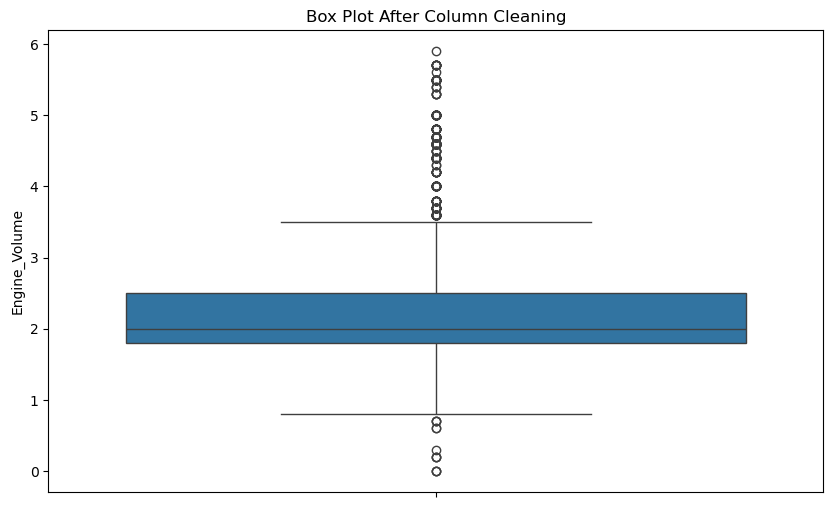

In [61]:
df = df[df['Engine_Volume'] < 6]

plt.figure(figsize=(10, 6))
sns.boxplot(df['Engine_Volume'])
plt.title("Box Plot After Column Cleaning")
plt.show()

In [64]:
df.columns

Index(['Id', 'Manufacturer', 'Model', 'Prod_Year', 'Category',
       'Leather_Interioe', 'Fuel_Type', 'Engine_Volume', 'Kilometers_Driven',
       'Gear_Box_Type', 'Drive_Wheel', 'Selling_Date', 'Wheel', 'Color',
       'Airbags', 'Price'],
      dtype='object')

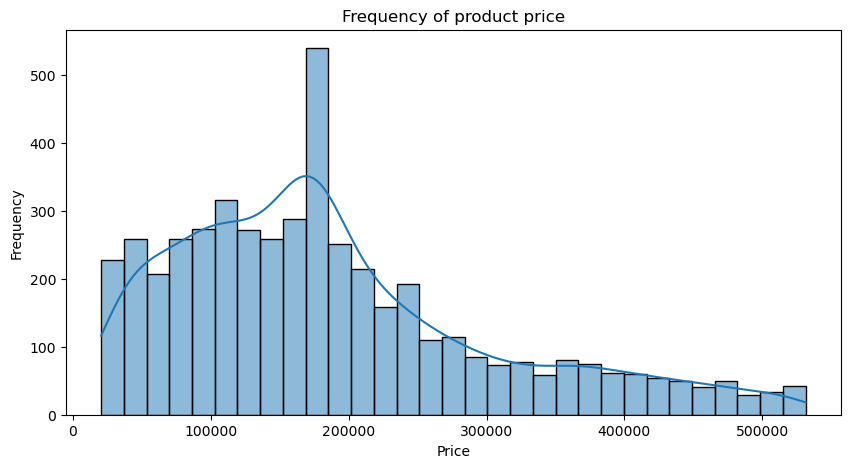

In [79]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Price',kde=True)
plt.title('Frequency of product price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

C:\Users\bikki\AppData\Local\Temp\ipykernel_8104\3501466848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Prod_Year',palette='viridis')


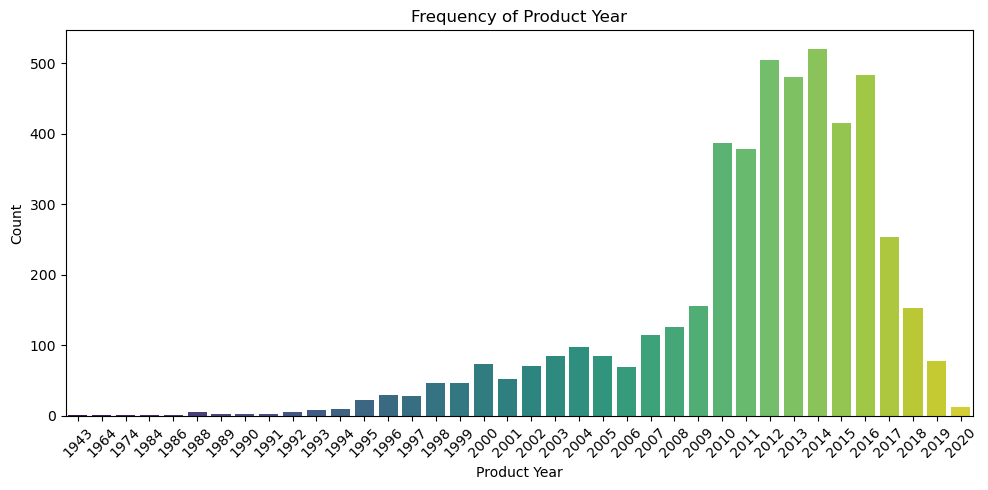

In [88]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Prod_Year',palette='viridis')
plt.title('Frequency of Product Year')
plt.xlabel('Product Year')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

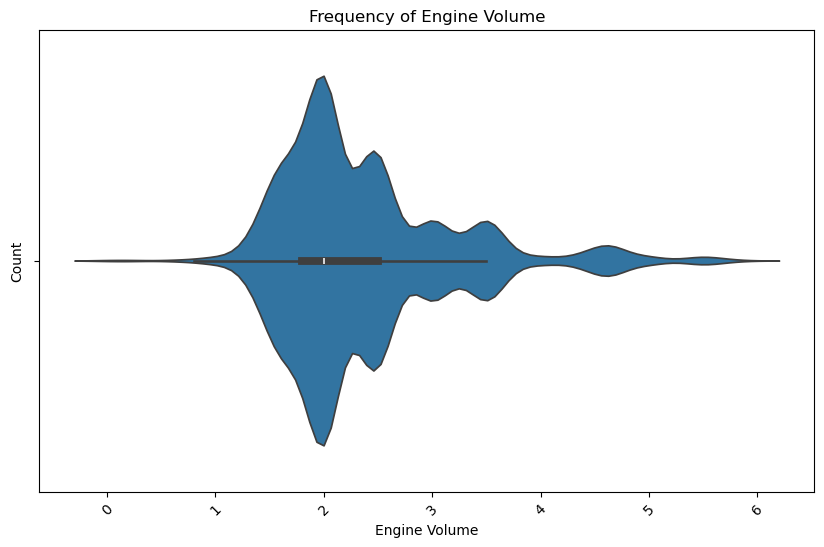

In [89]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df,x='Engine_Volume')
plt.title('Frequency of Engine Volume')
plt.xlabel('Engine Volume')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(7, 5))

sns.histplot(data=df,x='Airbags', palette='viridis',kde=True)

plt.title("Count plot for Airbags")
plt.xlabel("Number of Airbags")
plt.ylabel("Count")
plt.show()

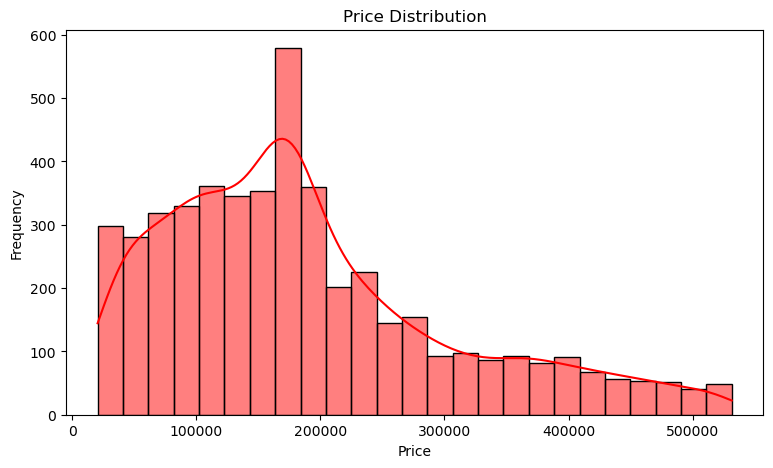

In [100]:
plt.figure(figsize=(9,5))
sns.histplot(data=df,x='Price',kde=True,color='red',bins=25)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 144 (\x90) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


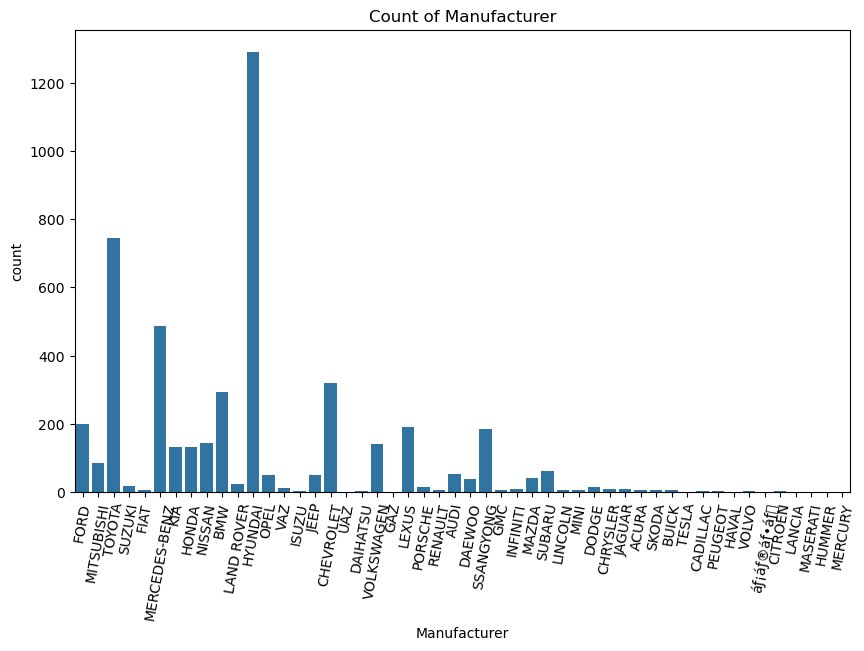

In [118]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Manufacturer')
plt.title('Count of Manufacturer')
plt.xticks(rotation=80)
plt.show()

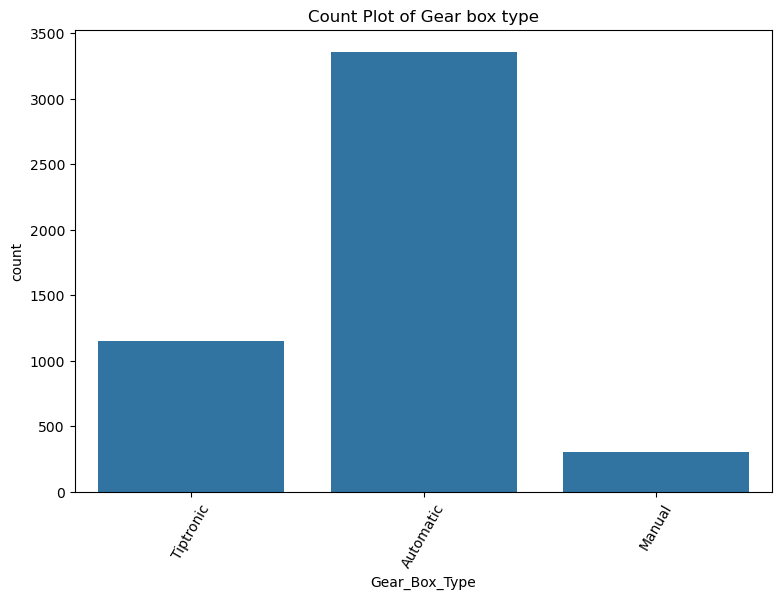

In [122]:
plt.figure(figsize=(9,6))
sns.countplot(data=df, x='Gear_Box_Type')
plt.title('Count Plot of Gear box type')
plt.xticks(rotation=60)
plt.show()

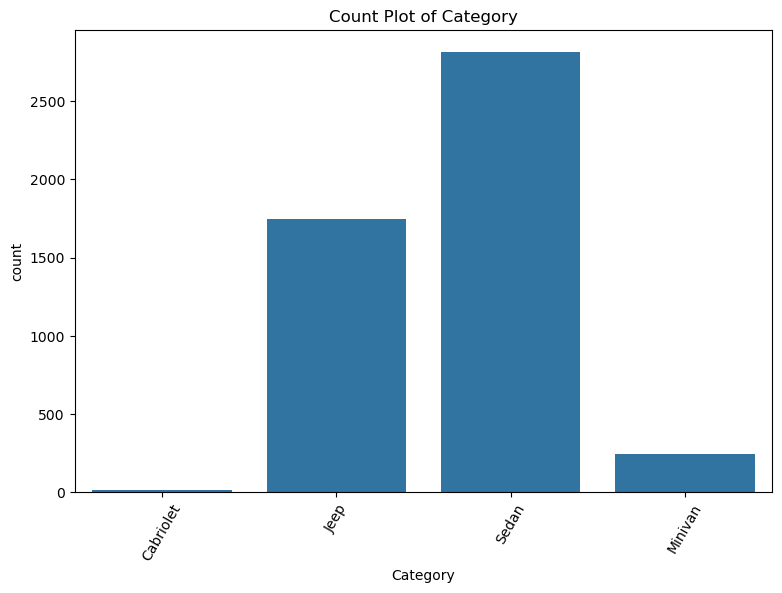

In [123]:
plt.figure(figsize=(9,6))
sns.countplot(data=df, x='Category')
plt.title('Count Plot of Category')
plt.xticks(rotation=60)
plt.show()

In [125]:
df.rename(columns={'Leather_Interioe':'Leather_Interior'},inplace=True)

C:\Users\bikki\AppData\Local\Temp\ipykernel_8104\1580041807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Leather_Interioe':'Leather_Interior'},inplace=True)


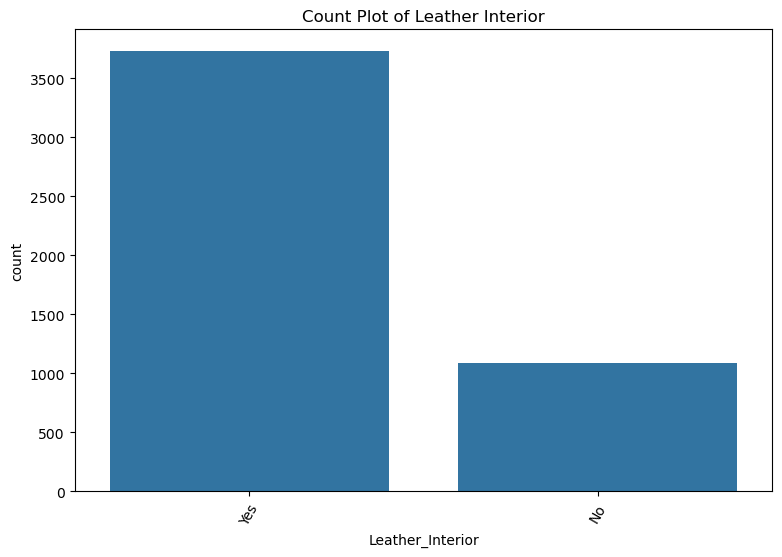

In [126]:
plt.figure(figsize=(9,6))
sns.countplot(data=df, x='Leather_Interior')
plt.title('Count Plot of Leather Interior')
plt.xticks(rotation=60)
plt.show()

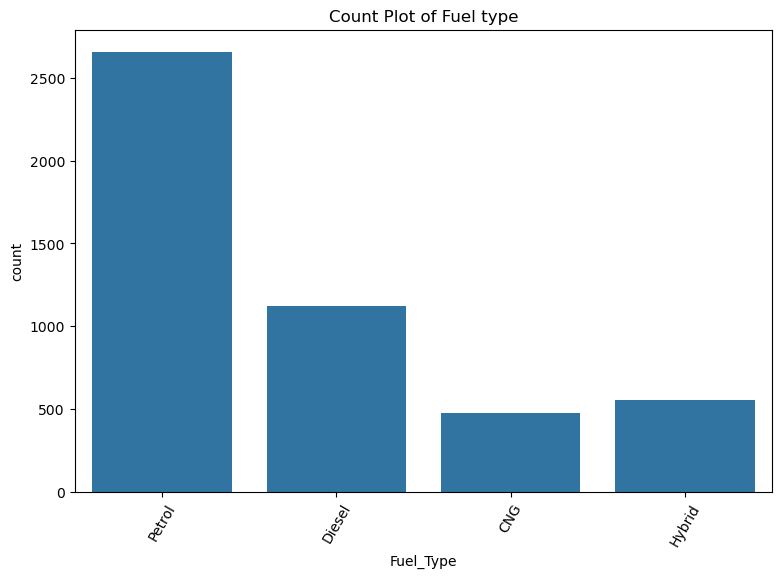

In [127]:
plt.figure(figsize=(9,6))
sns.countplot(data=df, x='Fuel_Type')
plt.title('Count Plot of Fuel type')
plt.xticks(rotation=60)
plt.show()

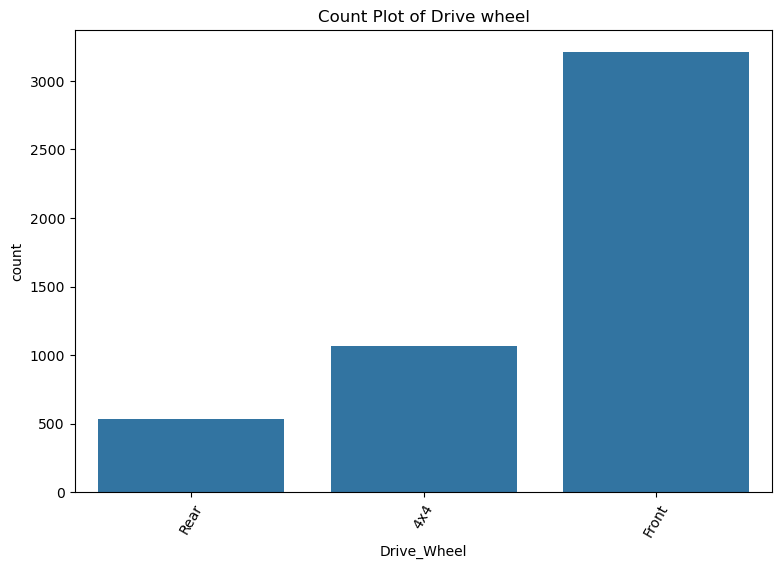

In [128]:
plt.figure(figsize=(9,6))
sns.countplot(data=df, x='Drive_Wheel')
plt.title('Count Plot of Drive wheel')
plt.xticks(rotation=60)
plt.show()

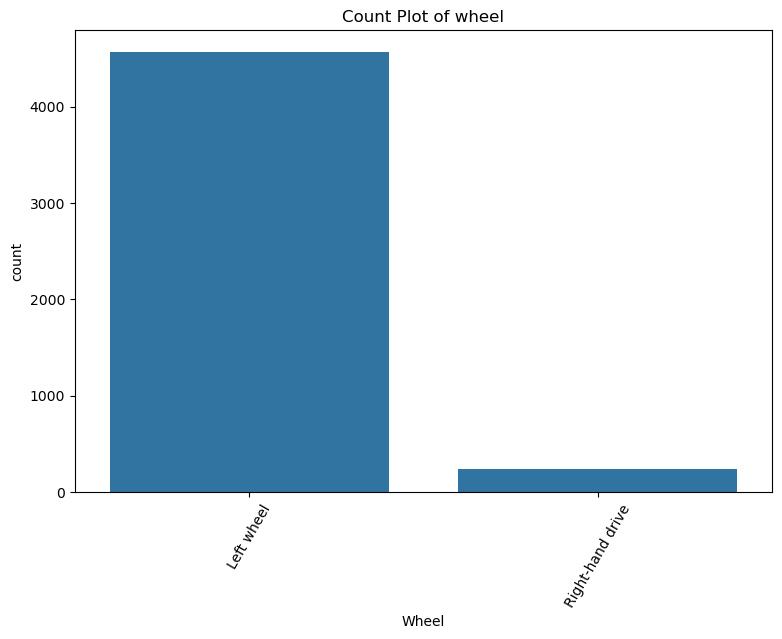

In [129]:
plt.figure(figsize=(9,6))
sns.countplot(data=df, x='Wheel')
plt.title('Count Plot of wheel')
plt.xticks(rotation=60)
plt.show()

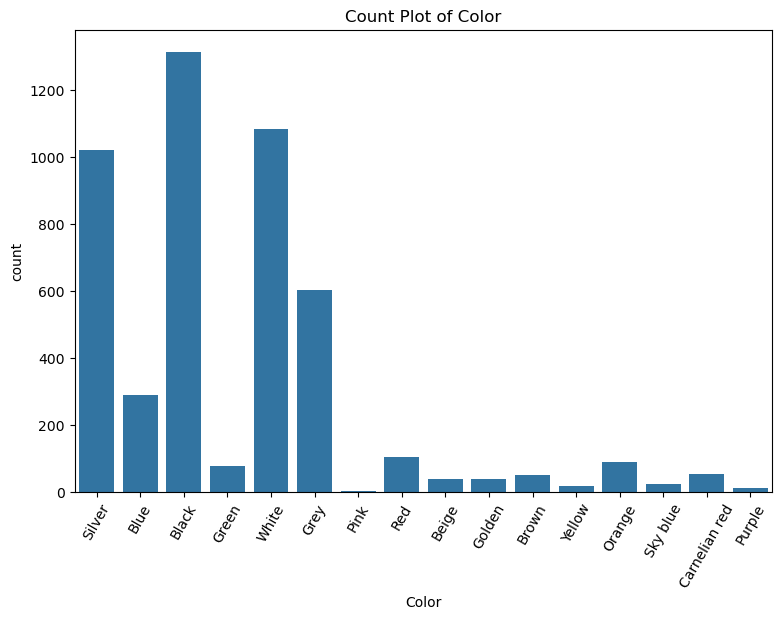

In [130]:
plt.figure(figsize=(9,6))
sns.countplot(data=df, x='Color')
plt.title('Count Plot of Color')
plt.xticks(rotation=60)
plt.show()

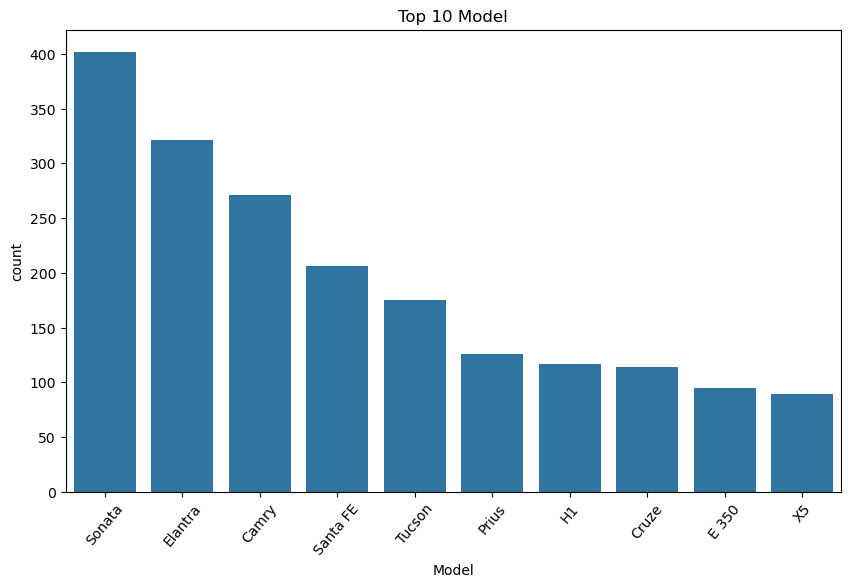

In [135]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Model',order=df['Model'].value_counts().index[:10])
plt.title('Top 10 Model')
plt.xticks(rotation=50)
plt.show()

### Manufacturer V.S Price 

In [150]:
df_manu= df.groupby(['Manufacturer'])['Price'].max().reset_index().sort_values(by='Price',ascending=True)

C:\Users\bikki\AppData\Local\Temp\ipykernel_8104\1017851078.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_manu, x='Manufacturer', y='Price', palette='viridis')
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 144 (\x90) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


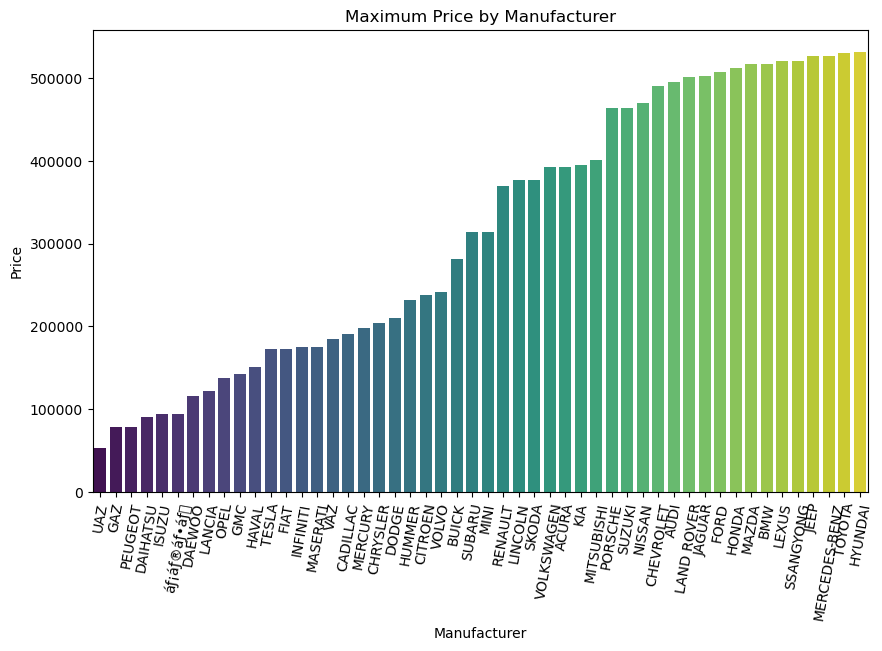

In [151]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_manu, x='Manufacturer', y='Price', palette='viridis')
plt.title('Maximum Price by Manufacturer')
plt.xticks(rotation=80)
plt.show()

###  Category V/S Price

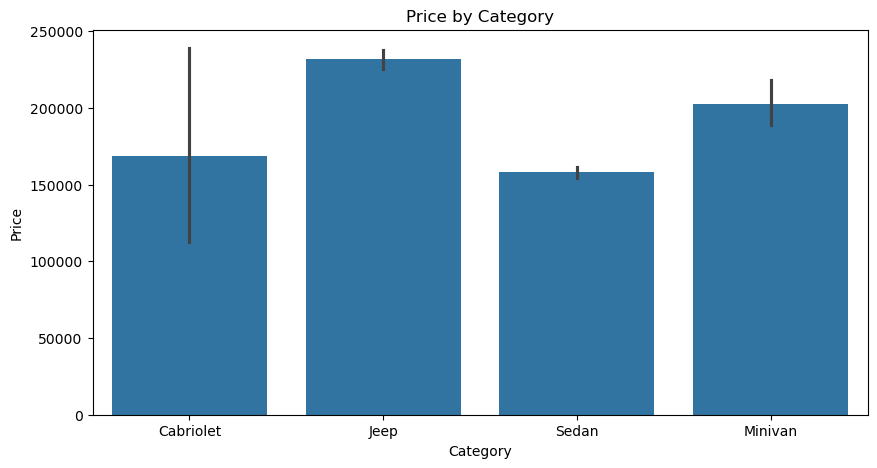

In [159]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Category',y='Price')
plt.title('Price by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

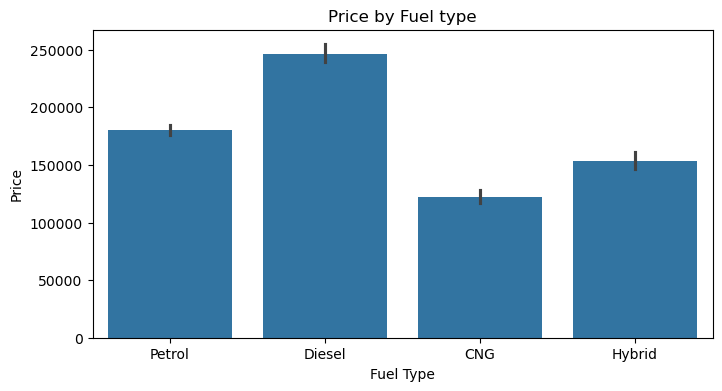

In [180]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='Fuel_Type',y='Price')
plt.title('Price by Fuel type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

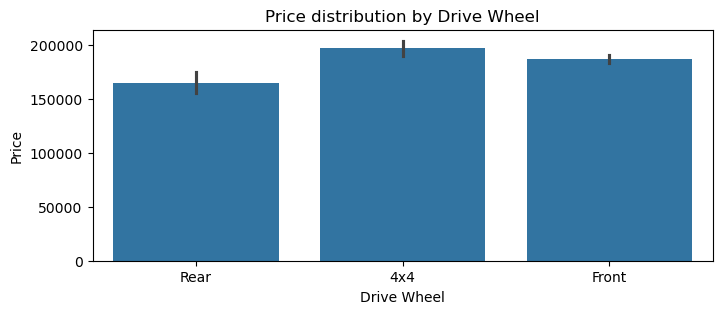

In [176]:
plt.figure(figsize=(8,3))
sns.barplot(data=df, x='Drive_Wheel',y='Price')
plt.title('Price distribution by Drive Wheel')
plt.xlabel('Drive Wheel')
plt.ylabel('Price')
plt.show()

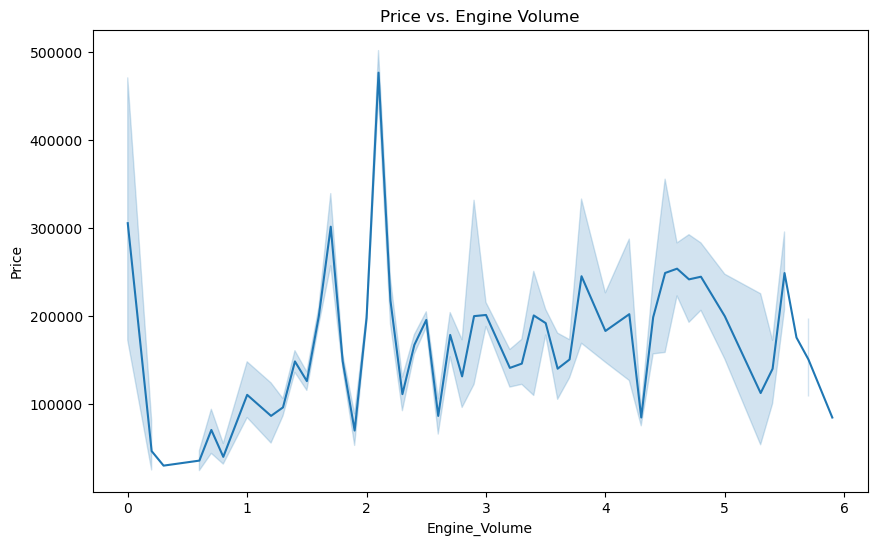

In [162]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Engine_Volume', y='Price', )
plt.title('Price vs. Engine Volume')
plt.show()

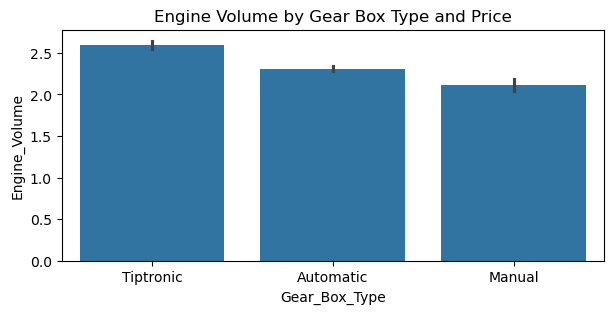

In [170]:
plt.figure(figsize=(7, 3))
sns.barplot(data=df, x='Gear_Box_Type', y='Engine_Volume')
plt.title('Engine Volume by Gear Box Type and Price')
plt.show()

<Axes: title={'center': 'Gear box type vs Price'}, xlabel='Gear_Box_Type', ylabel='Price'>

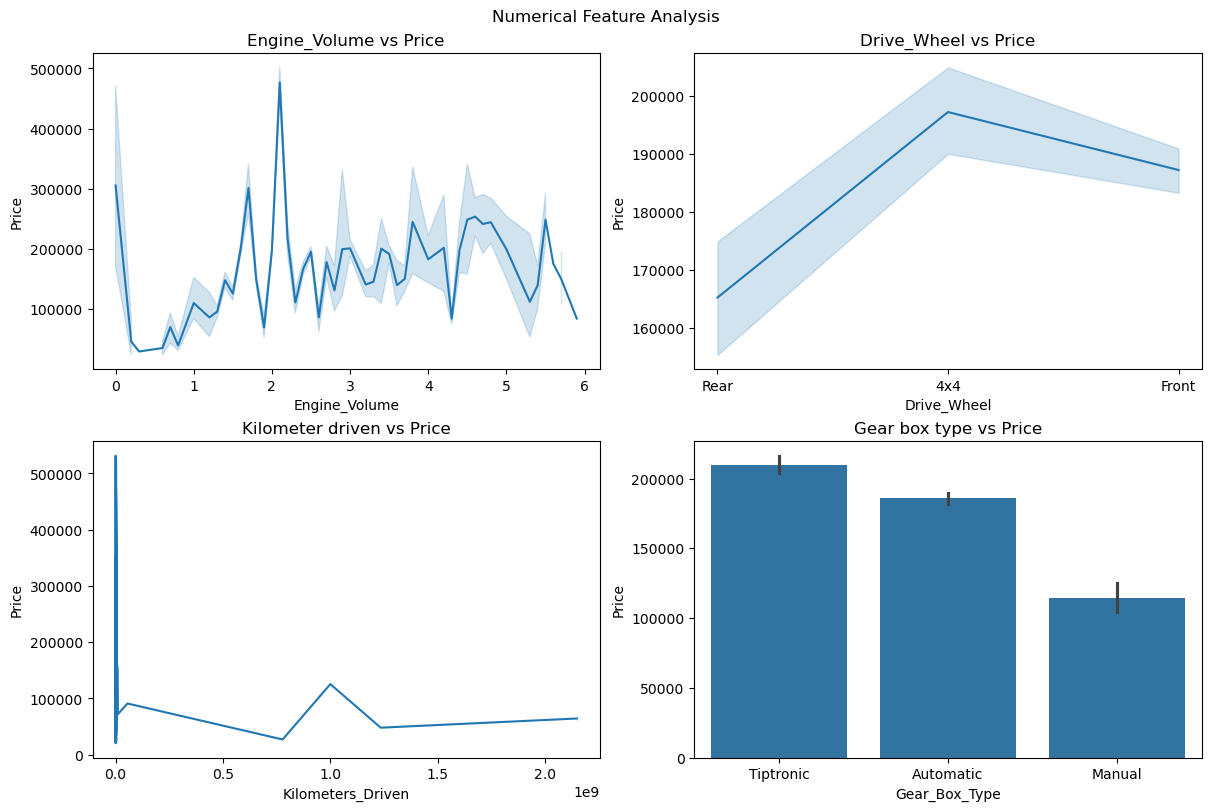

In [209]:
fig, axs = plt.subplots(2,2, figsize=(12,8), constrained_layout=True)
fig.suptitle("Numerical Feature Analysis")


axs[0,0].set_title("Engine_Volume vs Price")
sns.lineplot(data=df, x='Engine_Volume', y='Price', ax=axs[0, 0])

axs[0, 1].set_title("Drive_Wheel vs Price")
sns.lineplot(data=df, x='Drive_Wheel', y='Price', ax=axs[0, 1])

axs[1,0].set_title("Kilometer driven vs Price")
sns.lineplot(data=df, x='Kilometers_Driven', y='Price', ax=axs[1, 0])

axs[1,1].set_title("Gear box type vs Price")
sns.barplot(data=df, x='Gear_Box_Type', y='Price', ax=axs[1, 1])

### Group by Manufacturer, Model, Category, and Color, and calculate the max Price

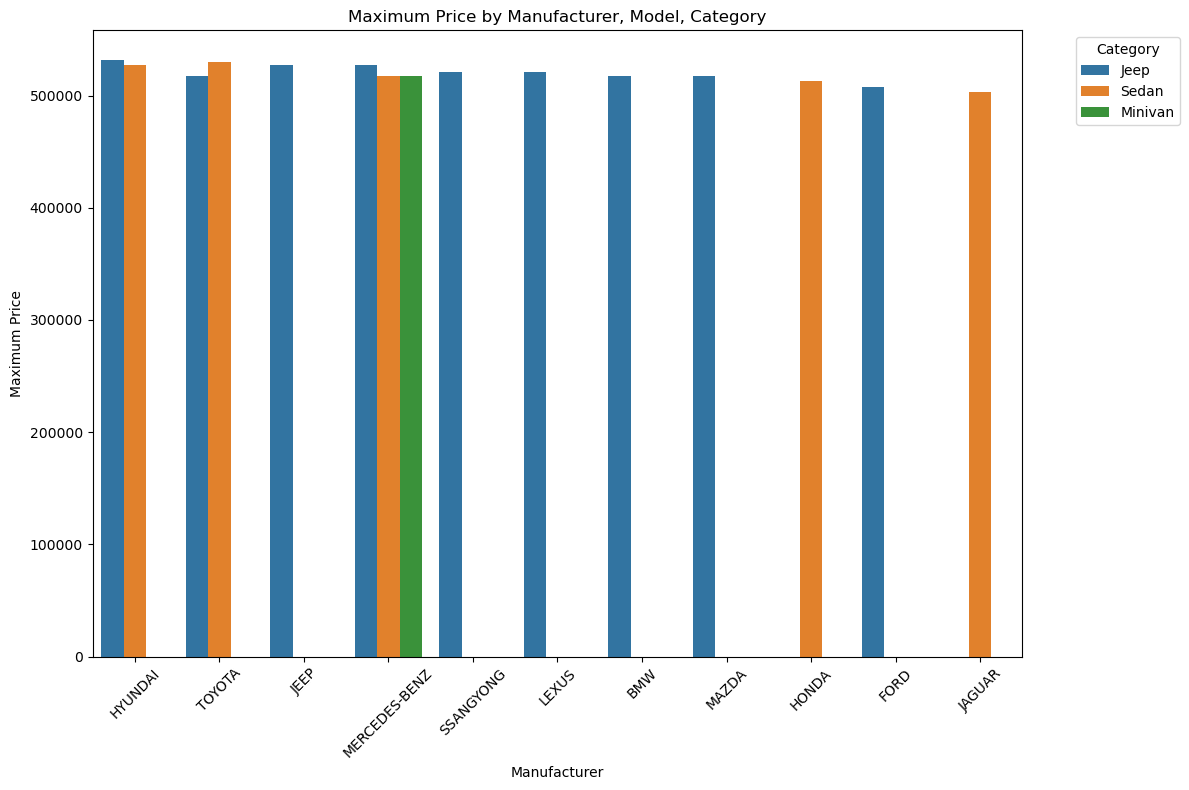

In [225]:
grouped_data = df.groupby(['Manufacturer','Category'])['Price'].max().reset_index()

top_5_data = grouped_data.sort_values(by='Price',ascending=False).head(15)
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_5_data,
    x='Manufacturer',
    y='Price',
    hue='Category'
)
plt.title("Maximum Price by Manufacturer, Model, Category")
plt.xlabel("Manufacturer")
plt.ylabel("Maximum Price")
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()



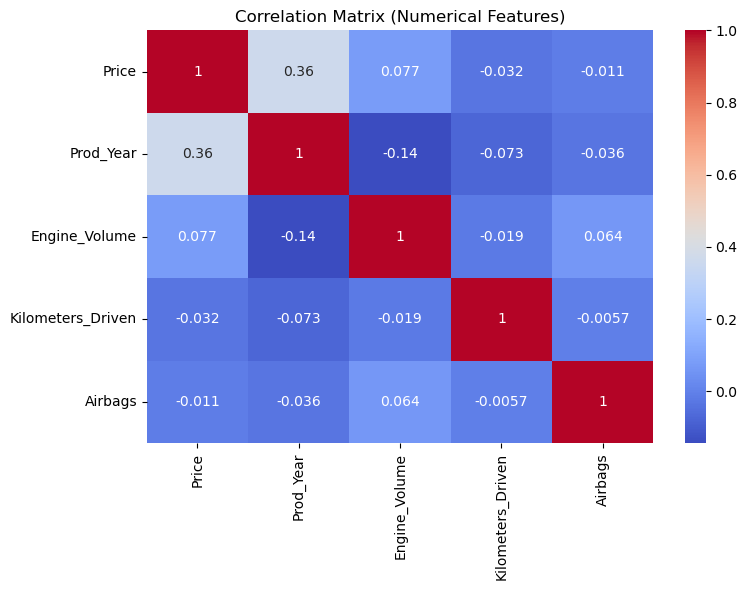

In [211]:
plt.figure(figsize=(8, 6))
corr = df[['Price', 'Prod_Year', 'Engine_Volume', 'Kilometers_Driven', 'Airbags']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Features)')
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 144 (\x90) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 144 (\x90) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


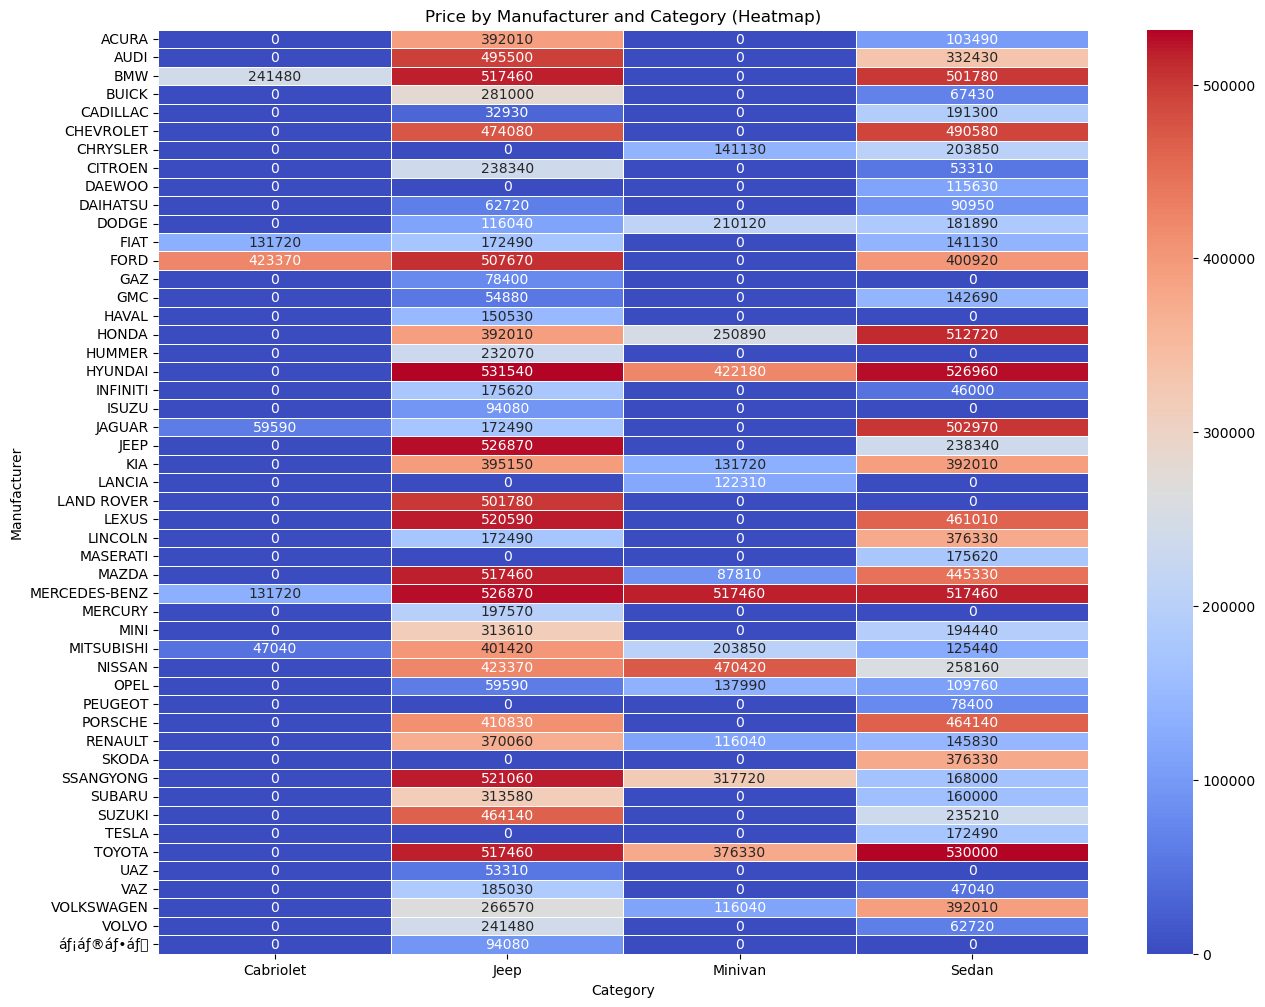

In [228]:
df_pivot = df.groupby(['Manufacturer', 'Category'])['Price'].max().unstack().fillna(0)

plt.figure(figsize=(15, 12))
sns.heatmap(df_pivot, annot=True, fmt='g', cmap='coolwarm', linewidths=0.5)
plt.title('Price by Manufacturer and Category (Heatmap)')
plt.xlabel('Category')
plt.ylabel('Manufacturer')
plt.show()


### Import Libraries and Load Data

In [235]:
from sklearn.preprocessing import LabelEncoder

In [236]:
le=LabelEncoder()

In [237]:
df.columns

Index(['Id', 'Manufacturer', 'Model', 'Prod_Year', 'Category',
       'Leather_Interior', 'Fuel_Type', 'Engine_Volume', 'Kilometers_Driven',
       'Gear_Box_Type', 'Drive_Wheel', 'Selling_Date', 'Wheel', 'Color',
       'Airbags', 'Price'],
      dtype='object')

In [238]:
df['Manufacturer'] = le.fit_transform(df['Manufacturer'])
df['Category'] = le.fit_transform(df['Category'])
df['Leather_Interior'] = le.fit_transform(df['Leather_Interior'])
df['Gear_Box_Type'] = le.fit_transform(df['Gear_Box_Type'])
df['Drive_Wheel'] = le.fit_transform(df['Drive_Wheel'])
df['Wheel'] = le.fit_transform(df['Wheel'])
df['Color'] = le.fit_transform(df['Color'])

C:\Users\bikki\AppData\Local\Temp\ipykernel_8104\1826101204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Manufacturer'] = le.fit_transform(df['Manufacturer'])
C:\Users\bikki\AppData\Local\Temp\ipykernel_8104\1826101204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = le.fit_transform(df['Category'])
C:\Users\bikki\AppData\Local\Temp\ipykernel_8104\1826101204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [241]:
one_hot_encode = ['Model', 'Drive_Wheel','Leather_Interior','Fuel_Type','Category']

In [249]:
df_one_hot = pd.get_dummies(df, columns=one_hot_encode, drop_first=True, dtype=int)

In [245]:
df_combined = pd.concat([df, df_one_hot], axis=1)
df_combined.drop(columns=one_hot_encode, inplace=True)

In [247]:
df_combined

,Id,Manufacturer,Prod_Year,Engine_Volume,Kilometers_Driven,Gear_Box_Type,Selling_Date,Wheel,Color,Airbags,...,Model_macan,Drive_Wheel_1,Drive_Wheel_2,Leather_Interior_1,Fuel_Type_Diesel,Fuel_Type_Hybrid,Fuel_Type_Petrol,Category_1,Category_2,Category_3
0,45624039,12,2016,2.3,75000.0,2,2023-03-02,0,12,6.0,...,0,0,1,1,0,0,1,0,0,0
1,45766794,33,1997,2.4,142000.0,0,2023-03-02,0,2,6.0,...,0,0,0,0,0,0,1,1,0,0
2,45709646,44,2001,2.0,91000.0,0,2023-03-02,1,12,4.0,...,0,0,0,0,0,0,1,1,0,0
3,45816588,42,2008,1.6,98000.0,0,2023-03-02,0,1,12.0,...,0,0,0,0,0,0,1,1,0,0
4,45759758,33,2006,0.7,314000.0,1,2023-03-02,1,12,2.0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,45602856,26,2015,2.5,90000.0,2,2023-05-05,0,12,8.0,...,0,0,1,1,0,0,1,0,0,1
4815,45089354,2,2014,2.0,70000.0,2,2023-05-05,0,1,10.0,...,0,0,1,1,0,0,1,0,0,1
4816,45264871,12,2011,3.0,104000.0,0,2023-05-05,0,1,6.0,...,0,0,0,1,0,0,1,1,0,0
4817,45510310,44,2008,4.7,138000.0,0,2023-05-05,0,1,10.0,...,0,0,0,1,0,0,1,1,0,0


###  2.	Label Encoding:

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [20]:
df.columns

Index(['Id', 'Manufacturer', 'Model', 'Prod_Year', 'Category',
       'Leather_Interioe', 'Fuel_Type', 'Engine Volume', 'Kilometers_Driven',
       'Gear_Box_Type', 'Drive_Wheel', 'Selling_Date', 'Wheel', 'Color',
       'Airbags', 'Price'],
      dtype='object')

In [23]:
df['Manufacturer'] = le.fit_transform(df['Manufacturer'])
df['Category'] = le.fit_transform(df['Category'])
df['Leather_Interioe'] = le.fit_transform(df['Leather_Interioe'])
df['Gear_Box_Type'] = le.fit_transform(df['Gear_Box_Type'])
df['Drive_Wheel'] = le.fit_transform(df['Drive_Wheel'])
df['Wheel'] = le.fit_transform(df['Wheel'])
df['Color'] = le.fit_transform(df['Color'])

###  3.	One-Hot Encoding:

In [27]:
one_hot_encode = ['Model', 'Drive_Wheel','Leather_Interioe','Fuel_Type','Category']

In [28]:
df_one_hot = pd.get_dummies(df, columns=one_hot_encode, drop_first=True, dtype=int)

In [29]:
df_combined = pd.concat([df, df_one_hot], axis=1)
df_combined.drop(columns=one_hot_encode, inplace=True)

In [30]:
df_combined

,Id,Manufacturer,Prod_Year,Engine Volume,Kilometers_Driven,Gear_Box_Type,Selling_Date,Wheel,Color,Airbags,...,Model_macan,Drive_Wheel_1,Drive_Wheel_2,Leather_Interioe_1,Fuel_Type_Diesel,Fuel_Type_Hybrid,Fuel_Type_Petrol,Category_1,Category_2,Category_3
0,45624039,13,2016,2.3,75000.0,2,2023-03-02,0,12,6.0,...,0,0,1,1,0,0,1,0,0,0
1,45766794,34,1997,2.4,142000.0,0,2023-03-02,0,2,6.0,...,0,0,0,0,0,0,1,1,0,0
2,45709646,45,2001,2.0,91000.0,0,2023-03-02,1,12,4.0,...,0,0,0,0,0,0,1,1,0,0
3,45816588,43,2008,1.6,98000.0,0,2023-03-02,0,1,12.0,...,0,0,0,0,0,0,1,1,0,0
4,45759758,34,2006,0.7,314000.0,1,2023-03-02,1,12,2.0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,45602856,27,2015,2.5,90000.0,2,2023-05-05,0,12,8.0,...,0,0,1,1,0,0,1,0,0,1
4815,45089354,3,2014,2.0,70000.0,2,2023-05-05,0,1,10.0,...,0,0,1,1,0,0,1,0,0,1
4816,45264871,13,2011,3.0,104000.0,0,2023-05-05,0,1,6.0,...,0,0,0,1,0,0,1,1,0,0
4817,45510310,45,2008,4.7,138000.0,0,2023-05-05,0,1,10.0,...,0,0,0,1,0,0,1,1,0,0
